# Test case №2:

You can find the file in this folder, which contains Linkedin profile scrapes of individuals that were part of an outreach effort. The goal is to get people to purchase a ticket to an event and ultimately join the organization as a member.  Since the same method of profile scraping will be used in the future to identify the best leads, it's important that patterns that exist in the content of the profiles be identified.

The column 'Result' has one of six outcomes for each person:
- Purchased membership: The ideal outcome, bought an event ticket and a membership
- Purchased event: A positive outcome but not ideal
- Approved: They were approved to come to an event but did not purchase
- Sent personal f/u: Conversation was started but ended
- Out of sequence: Conversation was started but ended
- 2021 Member: Someone who was a previous member of the organization

In order to better focus outreach efforts in the future, we need to determine which characteristics show a higher probability of purchasing a membership and/or purchasing an event ticket.

Please provide an analysis that identifies what traits, characteristics, patterns, etc. can be used to indicate a higher probability of a positive/ideal outcome and please describe your methodology.

## Loading and describing the data.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import warnings
from scipy import stats

In [2]:
df = pd.read_excel('Linkedin Accounts That Purchased Memberships.xlsx')

In [3]:
df.shape

(348, 74)

In [4]:
pd.set_option('display.max_columns', None)
df.head(5)

,linkedinProfile,Result,Other,email,description,headline,location,firstName,lastName,fullName,subscribers,userId,mutualConnectionsText,mailFromDropcontact,company,companyUrl,jobTitle,jobDescription,jobLocation,jobDateRange,company2,companyUrl2,jobTitle2,jobDescription2,jobDateRange2,school,schoolUrl,schoolDegree,schoolDegreeSpec,schoolDateRange,school2,schoolUrl2,schoolDegree2,schoolDegreeSpec2,schoolDateRange2,qualificationFromDropContact,civilityFromDropContact,phoneNumberFromDropContact,websiteFromDropContact,twitter,website,companyWebsite,allSkills,skill1,endorsement1,skill2,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6,baseUrl,profileId,timestamp,jobLocation2,connectionsCount,mail,birthday,schoolDescription2,naf5CodeFromDropContact,naf5DesFromDropContact,sirenFromDropContact,siretFromDropContact,siretAddressFromDropContact,siretZipFromDropContact,vatFromDropContact,schoolDescription,nbEmployeesFromDropContact,Unnamed: 72,Unnamed: 73
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,1704.0,3172258.0,1 mutual connection: Eric Sullivan,mk@aeroscena.com,Aeroscena,https://www.linkedin.com/company/aeroscena/,CEO,Aeroscena develops and markets fragrances from...,"Cleveland/Akron, Ohio Area",Sep 2010 â€“ Present,Cleveland Clinic Wellness Institute,https://www.linkedin.com/company/cleveland-cli...,Advisor to the Chairman,Supporting the Chairman of the Wellness Instit...,2009 â€“ 2010,Audencia Nantes Ecole de Management,https://www.linkedin.com/school/19998/?legacyS...,master,marketing,1984 â€“ 1985,The Ohio State University,https://www.linkedin.com/school/19133/?legacyS...,BSBA,International Business,1979 â€“ 1983,nominative@pro,Mr,+1 800-671-1890,www.aeroscena.com,ShopAscents,stumbleupon.com/content/1LSMVB,https://aeroscena.com,"Strategic Planning, Leadership, Marketing Stra...",Strategic Planning,31,Leadership,26,Marketing Strategy,24,Strategy,21,New Business Development,18,Business Strategy,15,https://www.linkedin.com/in/mark-kohoot-96a08b1,mark-kohoot-96a08b1,2022-01-03T20:00:58.586Z,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,1745.0,14910006.0,1 mutual connection: Eric Sullivan,jon@kidsdraw.org,Kids Draw Bob,https://www.linkedin.com/company/kidsdrawbob/,President and Illustrator,The energy in a room of children who've found ...,"Bloomfield Hills, MI",Jul 2019 â€“ Present,"High Level Marketing, LLC",https://www.linkedin.com/company/high-level-ma...,Co Founder and CTO - VP of Product Development,As one of the fastest growing online marketing...,Nov 2009 â€“ Present,University of Michigan,https://www.linkedin.com/school/18633/?legacyS...,Bachelor of Science (B.S.),Architecture,1999 â€“ 2004,Walled Lake Central High School,https://www.linkedin.com/school/3204390/?legac...,High School Diploma,NaN,1995 â€“ 1999,nominative@pro,Mr,NaN,www.kidsdraw.org,NaN,NaN,http://www.kidsdraw.org/donate,"Web Design, Marketing, Business Strategy, SEO,...",Web Design,99,Marketing,66,Business Strategy,11,SEO,47,Web Development,40,Online Marketing,32,https://www.linkedin.com/in/jonbowerman,jonbowerman,2022-01-03T20:01:43.218Z,"West Bloomfield, MI",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,NaN,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,2549.0,22364061.0,NaN,parker@hedgehoghealth.com,HedgeHog Health,https://www.linkedin.com/company/hedgehoghealth/,Chief Executi

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 74 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   linkedinProfile               348 non-null    object        
 1   Result                        348 non-null    object        
 2   Other                         191 non-null    object        
 3   email                         216 non-null    object        
 4   description                   278 non-null    object        
 5   headline                      347 non-null    object        
 6   location                      348 non-null    object        
 7   firstName                     348 non-null    object        
 8   lastName                      348 non-null    object        
 9   fullName                      348 non-null    object        
 10  subscribers                   347 non-null    float64       
 11  userId                        28

***Output:*** The data file has been successfully read. The table has 74 columns and 348 rows. It's advisable to convert all column names to lowercase. It's also recommended to transform the data type of the 'userid' field to integer.

## Data preparation.

### Checking column names and their processing.

In [6]:
df.columns = map(str.lower, df.columns)

### Converting to the required data types.

In [7]:
df['userid'] = df['userid'].astype(float).astype('Int64')
df['subscribers'] = df['subscribers'].astype(float).astype('Int64')

### Exploration and handling of duplicates.

In [8]:
df.duplicated().sum()

0

### Analysis of missing values.

In [9]:
pd.set_option('display.max_rows', None)
df.isna().sum().sort_values(ascending=False)

unnamed: 72                     348
mail                            345
mutualconnectionstext           344
nbemployeesfromdropcontact      336
naf5desfromdropcontact          334
siretzipfromdropcontact         333
siretaddressfromdropcontact     333
vatfromdropcontact              332
siretfromdropcontact            332
sirenfromdropcontact            332
naf5codefromdropcontact         332
schooldescription2              304
connectionscount                298
unnamed: 73                     286
schooldescription               284
birthday                        253
phonenumberfromdropcontact      244
twitter                         206
schooldegreespec2               205
mailfromdropcontact             194
qualificationfromdropcontact    194
schooldegree2                   192
schoolurl2                      184
jobdescription                  179
schooldaterange2                171
jobdescription2                 165
other                           157
website                     

Gaps have been detected in many fields. Some columns are completely empty in the data. It seems that empty columns can be completely removed, but we will leave them; perhaps the completeness of the profile somehow affects ticket purchases.

In [10]:
df['civilityfromdropcontact'].unique()

array(['Mr', 'Mrs', nan], dtype=object)

Let's fill in the empty gender fields.

In [11]:
df['civilityfromdropcontact'] = df['civilityfromdropcontact'].fillna('not specified')

In [12]:
df['result'].unique()

array(['5. Purchased Membership', '4.Purchased Event', '3. Approved',
       'Out of Sequence', '2. Sent Personal f/u', '2021 Member'],
      dtype=object)

Let's create a function for encoding the parameter indicating whether the user bought a ticket or not. Bought 1, Not bought 0.

In [13]:
def result_buy(result):
    if result == '5. Purchased Membership' or result == '4.Purchased Event':
        x = '1'
    else:
        x = '0'
    return x

Let's create a new field and assign values 1 or 0 to it.

In [14]:
df['result_buy'] = df['result'].apply(result_buy)
df.head(5)

,linkedinprofile,result,other,email,description,headline,location,firstname,lastname,fullname,subscribers,userid,mutualconnectionstext,mailfromdropcontact,company,companyurl,jobtitle,jobdescription,joblocation,jobdaterange,company2,companyurl2,jobtitle2,jobdescription2,jobdaterange2,school,schoolurl,schooldegree,schooldegreespec,schooldaterange,school2,schoolurl2,schooldegree2,schooldegreespec2,schooldaterange2,qualificationfromdropcontact,civilityfromdropcontact,phonenumberfromdropcontact,websitefromdropcontact,twitter,website,companywebsite,allskills,skill1,endorsement1,skill2,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6,baseurl,profileid,timestamp,joblocation2,connectionscount,mail,birthday,schooldescription2,naf5codefromdropcontact,naf5desfromdropcontact,sirenfromdropcontact,siretfromdropcontact,siretaddressfromdropcontact,siretzipfromdropcontact,vatfromdropcontact,schooldescription,nbemployeesfromdropcontact,unnamed: 72,unnamed: 73,result_buy
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,1704,3172258,1 mutual connection: Eric Sullivan,mk@aeroscena.com,Aeroscena,https://www.linkedin.com/company/aeroscena/,CEO,Aeroscena develops and markets fragrances from...,"Cleveland/Akron, Ohio Area",Sep 2010 â€“ Present,Cleveland Clinic Wellness Institute,https://www.linkedin.com/company/cleveland-cli...,Advisor to the Chairman,Supporting the Chairman of the Wellness Instit...,2009 â€“ 2010,Audencia Nantes Ecole de Management,https://www.linkedin.com/school/19998/?legacyS...,master,marketing,1984 â€“ 1985,The Ohio State University,https://www.linkedin.com/school/19133/?legacyS...,BSBA,International Business,1979 â€“ 1983,nominative@pro,Mr,+1 800-671-1890,www.aeroscena.com,ShopAscents,stumbleupon.com/content/1LSMVB,https://aeroscena.com,"Strategic Planning, Leadership, Marketing Stra...",Strategic Planning,31,Leadership,26,Marketing Strategy,24,Strategy,21,New Business Development,18,Business Strategy,15,https://www.linkedin.com/in/mark-kohoot-96a08b1,mark-kohoot-96a08b1,2022-01-03T20:00:58.586Z,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,1745,14910006,1 mutual connection: Eric Sullivan,jon@kidsdraw.org,Kids Draw Bob,https://www.linkedin.com/company/kidsdrawbob/,President and Illustrator,The energy in a room of children who've found ...,"Bloomfield Hills, MI",Jul 2019 â€“ Present,"High Level Marketing, LLC",https://www.linkedin.com/company/high-level-ma...,Co Founder and CTO - VP of Product Development,As one of the fastest growing online marketing...,Nov 2009 â€“ Present,University of Michigan,https://www.linkedin.com/school/18633/?legacyS...,Bachelor of Science (B.S.),Architecture,1999 â€“ 2004,Walled Lake Central High School,https://www.linkedin.com/school/3204390/?legac...,High School Diploma,NaN,1995 â€“ 1999,nominative@pro,Mr,NaN,www.kidsdraw.org,NaN,NaN,http://www.kidsdraw.org/donate,"Web Design, Marketing, Business Strategy, SEO,...",Web Design,99,Marketing,66,Business Strategy,11,SEO,47,Web Development,40,Online Marketing,32,https://www.linkedin.com/in/jonbowerman,jonbowerman,2022-01-03T20:01:43.218Z,"West Bloomfield, MI",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,NaN,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,2549,22364061,NaN,parker@hedgehoghealth.com,HedgeHog Health,https://www.linkedin.com/company/hedgehoghealth/,Chief Exec

***Output:*** Data has been loaded and verified; we can proceed with the analysis.

## Exploratory Data Analysis

Let's calculate the number of users who bought a ticket.

In [15]:
df.pivot_table(index = 'result_buy', values = 'linkedinprofile', aggfunc = 'count')

,linkedinprofile
result_buy,
0,338
1,10


Users who bought tickets: 10.

In [16]:
df.query('result == "2021 Member"')['linkedinprofile'].count()

157

Let's also add 1 to their column.

In [17]:
def result_buy(result):
    if result == '5. Purchased Membership' or result == '4.Purchased Event' or result == '2021 Member': 
        x = '1'
    else:
        x = '0'
    return x

In [18]:
df['result_buy'] = df['result'].apply(result_buy)

In [19]:
df.pivot_table(index = 'result_buy', values = 'linkedinprofile', aggfunc = 'count')

,linkedinprofile
result_buy,
0,181
1,167


***Output:*** Users who bought tickets in 2022: 10 people, and 157 people bought tickets in 2021. I think their profiles need to be analyzed. 167.

### Dependency on subscribers.

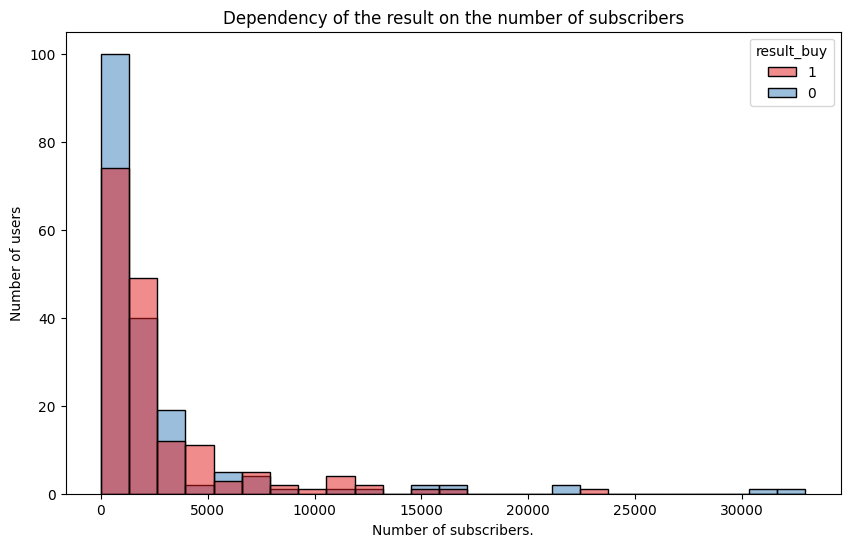

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x= 'subscribers', stat="count", common_norm=False, hue = 'result_buy', bins=25,  palette = "Set1")
plt.xlabel('Number of subscribers.')
plt.ylabel('Number of users')
plt.title("Dependency of the result on the number of subscribers");

On the graph, we can see that those who bought a ticket or were participants in 2021 have more subscribers than those who did not make a purchase.

### Dependency on gender.

In [21]:
df.groupby(['civilityfromdropcontact']) ['result'].value_counts(normalize=True)

civilityfromdropcontact  result                 
Mr                       2. Sent Personal f/u       0.429907
                         2021 Member                0.359813
                         Out of Sequence            0.084112
                         3. Approved                0.079439
                         4.Purchased Event          0.028037
                         5. Purchased Membership    0.018692
Mrs                      2. Sent Personal f/u       0.476190
                         2021 Member                0.301587
                         3. Approved                0.158730
                         Out of Sequence            0.063492
not specified            2021 Member                0.859155
                         2. Sent Personal f/u       0.070423
                         Out of Sequence            0.056338
                         3. Approved                0.014085
Name: proportion, dtype: float64

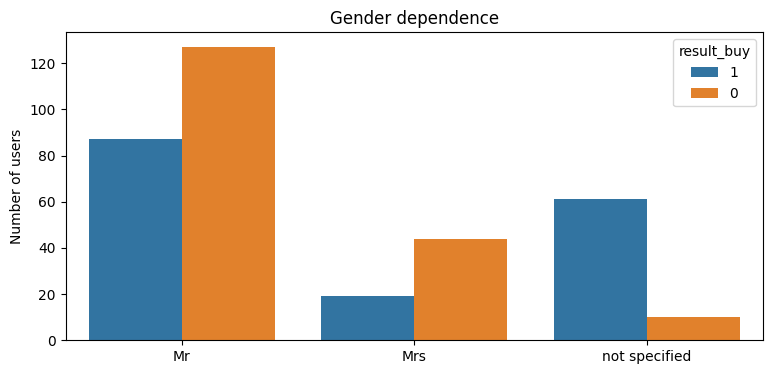

In [22]:
plt.figure(figsize=(9,4))
sns.countplot(x=df["civilityfromdropcontact"], hue=df["result_buy"])
plt.title('Gender dependence')
plt.xlabel('')
plt.ylabel('Number of users')
plt.show()

On the diagram, we can see that the majority of ticket purchases or participation in 2021 were made by individuals with unspecified gender.

### Dependency on Description

In [23]:
df['description_len'] = df['description'].str.len()

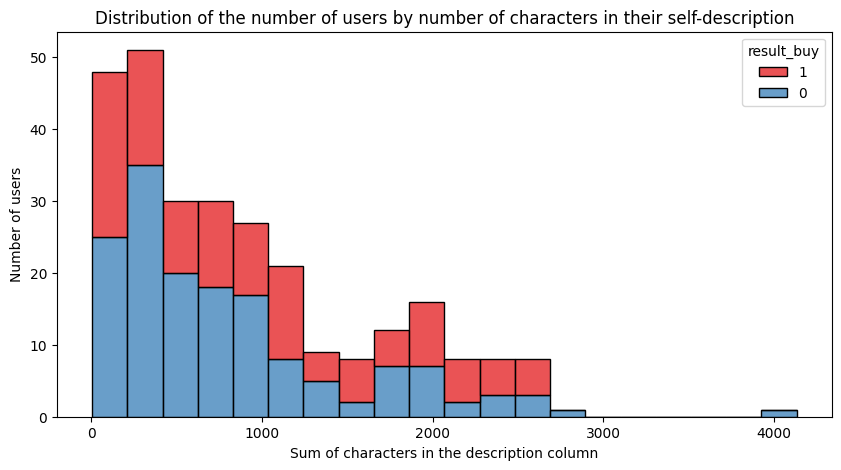

In [24]:
df = df.dropna(subset=['result_buy'])
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='description_len', bins=20, hue='result_buy', multiple="stack", palette = "Set1")
plt.title('Distribution of the number of users by number of characters in their self-description')
plt.xlabel('Sum of characters in the description column')
plt.ylabel('Number of users')
plt.show()

### Dependency on connectionscount.

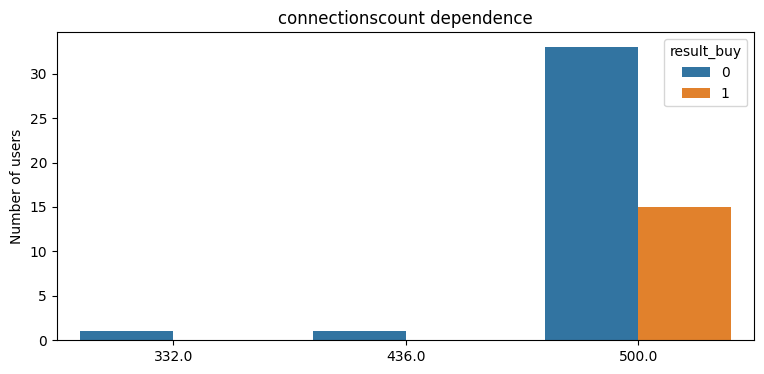

In [25]:
plt.figure(figsize=(9,4))
sns.countplot(x=df["connectionscount"], hue=df["result_buy"])
plt.title('connectionscount dependence')
plt.xlabel('')
plt.ylabel('Number of users')
plt.show()

People who bought tickets or participated in 2021 are those with more than 500 connectionscount.

### Dependency on Skills.

In [26]:
#Skills for those who bought a ticket or participated last year.
df_skill_by = df.query('result_buy == "1"')
skill_columns = df_skill_by.filter(regex='skill\d+')
if not skill_columns.empty:
    skill_counts = pd.DataFrame(columns=['skill', 'count'])
    for column in skill_columns.columns:
        skill_counts_temp = df_skill_by[column].str.split(',').explode().str.strip().value_counts().reset_index()
        skill_counts_temp.columns = ['skill', 'count']
        skill_counts = pd.concat([skill_counts, skill_counts_temp], ignore_index=True)
    skill_counts = skill_counts.groupby('skill')['count'].sum().reset_index()
skill_counts.sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

,skill,count
0,Marketing,44
1,Entrepreneurship,41
2,Social Media Marketing,37
3,Marketing Strategy,34
4,Social Media,31
5,Online Marketing,20
6,Strategic Planning,20
7,SEO,16
8,Start-ups,15
9,Business Development,15


In [27]:
#Skills of those who did not buy a ticket..
df_other = df.query('result_buy == "0"')
skill_columns = df_other.filter(regex='skill\d+')
if not skill_columns.empty:
    skill_counts = pd.DataFrame(columns=['skill', 'count'])
    for column in skill_columns.columns:
        skill_counts_temp = df_other[column].str.split(',').explode().str.strip().value_counts().reset_index()
        skill_counts_temp.columns = ['skill', 'count']
        skill_counts = pd.concat([skill_counts, skill_counts_temp], ignore_index=True)
    skill_counts = skill_counts.groupby('skill')['count'].sum().reset_index()
skill_counts.sort_values(by='count', ascending=False).reset_index(drop=True).head(10)

,skill,count
0,Marketing,37
1,Strategic Planning,30
2,Social Media,30
3,Entrepreneurship,24
4,Leadership,21
5,Strategy,21
6,Social Media Marketing,21
7,Sales,21
8,Marketing Strategy,19
9,Management,16


The most popular skills for those who bought tickets or participated are:
Marketing(44), Entrepreneurship (41), Social Media Marketing (37), Marketing Strategy(34), Social Media(31)
For other categories: 
0	Marketing	37
1	Strategic Planning	30
2	Social Media	30
3	Entrepreneurship	24
4	Leadership	21


### Dependency on endorsement.

Let's calculate the sum of the field endorsement.

In [28]:
columns = ['endorsement1', 'endorsement2', 'endorsement3', 'endorsement4', 'endorsement5', 'endorsement6']
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce').fillna(0)
df['sum_endorsements'] = df[columns].sum(axis=1)
df.head()

,linkedinprofile,result,other,email,description,headline,location,firstname,lastname,fullname,subscribers,userid,mutualconnectionstext,mailfromdropcontact,company,companyurl,jobtitle,jobdescription,joblocation,jobdaterange,company2,companyurl2,jobtitle2,jobdescription2,jobdaterange2,school,schoolurl,schooldegree,schooldegreespec,schooldaterange,school2,schoolurl2,schooldegree2,schooldegreespec2,schooldaterange2,qualificationfromdropcontact,civilityfromdropcontact,phonenumberfromdropcontact,websitefromdropcontact,twitter,website,companywebsite,allskills,skill1,endorsement1,skill2,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6,baseurl,profileid,timestamp,joblocation2,connectionscount,mail,birthday,schooldescription2,naf5codefromdropcontact,naf5desfromdropcontact,sirenfromdropcontact,siretfromdropcontact,siretaddressfromdropcontact,siretzipfromdropcontact,vatfromdropcontact,schooldescription,nbemployeesfromdropcontact,unnamed: 72,unnamed: 73,result_buy,description_len,sum_endorsements
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,1704,3172258,1 mutual connection: Eric Sullivan,mk@aeroscena.com,Aeroscena,https://www.linkedin.com/company/aeroscena/,CEO,Aeroscena develops and markets fragrances from...,"Cleveland/Akron, Ohio Area",Sep 2010 â€“ Present,Cleveland Clinic Wellness Institute,https://www.linkedin.com/company/cleveland-cli...,Advisor to the Chairman,Supporting the Chairman of the Wellness Instit...,2009 â€“ 2010,Audencia Nantes Ecole de Management,https://www.linkedin.com/school/19998/?legacyS...,master,marketing,1984 â€“ 1985,The Ohio State University,https://www.linkedin.com/school/19133/?legacyS...,BSBA,International Business,1979 â€“ 1983,nominative@pro,Mr,+1 800-671-1890,www.aeroscena.com,ShopAscents,stumbleupon.com/content/1LSMVB,https://aeroscena.com,"Strategic Planning, Leadership, Marketing Stra...",Strategic Planning,31.0,Leadership,26.0,Marketing Strategy,24.0,Strategy,21.0,New Business Development,18.0,Business Strategy,15.0,https://www.linkedin.com/in/mark-kohoot-96a08b1,mark-kohoot-96a08b1,2022-01-03T20:00:58.586Z,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1665.0,135.0
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,1745,14910006,1 mutual connection: Eric Sullivan,jon@kidsdraw.org,Kids Draw Bob,https://www.linkedin.com/company/kidsdrawbob/,President and Illustrator,The energy in a room of children who've found ...,"Bloomfield Hills, MI",Jul 2019 â€“ Present,"High Level Marketing, LLC",https://www.linkedin.com/company/high-level-ma...,Co Founder and CTO - VP of Product Development,As one of the fastest growing online marketing...,Nov 2009 â€“ Present,University of Michigan,https://www.linkedin.com/school/18633/?legacyS...,Bachelor of Science (B.S.),Architecture,1999 â€“ 2004,Walled Lake Central High School,https://www.linkedin.com/school/3204390/?legac...,High School Diploma,NaN,1995 â€“ 1999,nominative@pro,Mr,NaN,www.kidsdraw.org,NaN,NaN,http://www.kidsdraw.org/donate,"Web Design, Marketing, Business Strategy, SEO,...",Web Design,99.0,Marketing,66.0,Business Strategy,11.0,SEO,47.0,Web Development,40.0,Online Marketing,32.0,https://www.linkedin.com/in/jonbowerman,jonbowerman,2022-01-03T20:01:43.218Z,"West Bloomfield, MI",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1485.0,295.0
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,NaN,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,2549,22364061,NaN,parker@hedgehoghea

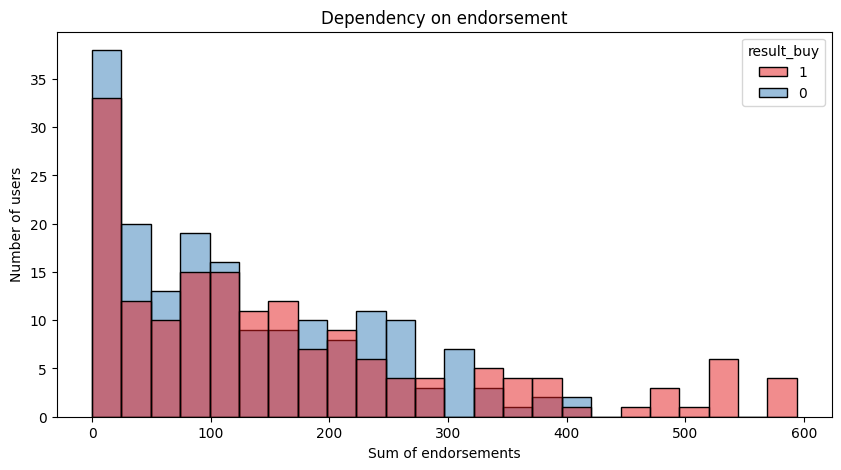

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='sum_endorsements', bins=24, hue='result_buy', palette = "Set1")
plt.title('Dependency on endorsement')
plt.xlabel('Sum of endorsements')
plt.ylabel('Number of users')
plt.show()

Chances of purchasing a ticket for users with scores between 127 and 175, as well as those with scores greater than 475.

### Impact of profile completeness

In [30]:
result_df = pd.DataFrame(columns=['Column', '1', '0'])
for column in df.columns:
    if column == 'result_buy':
        continue
    missing_count_1 = df[column].isnull().sum()
    missing_count_0 = df.query('result_buy == "0"')[column].isnull().sum()
    result_df = pd.concat([result_df, pd.DataFrame({'Column': [column], '1': [missing_count_1], '0': [missing_count_0]})], ignore_index=True)
result_df.sort_values(by='1', ascending=False)

,Column,1,0
72,unnamed: 72,348,181
60,mail,345,181
12,mutualconnectionstext,344,180
71,nbemployeesfromdropcontact,336,174
64,naf5desfromdropcontact,334,168
68,siretzipfromdropcontact,333,167
67,siretaddressfromdropcontact,333,167
65,sirenfromdropcontact,332,166
69,vatfromdropcontact,332,166
63,naf5codefromdropcontact,332,166


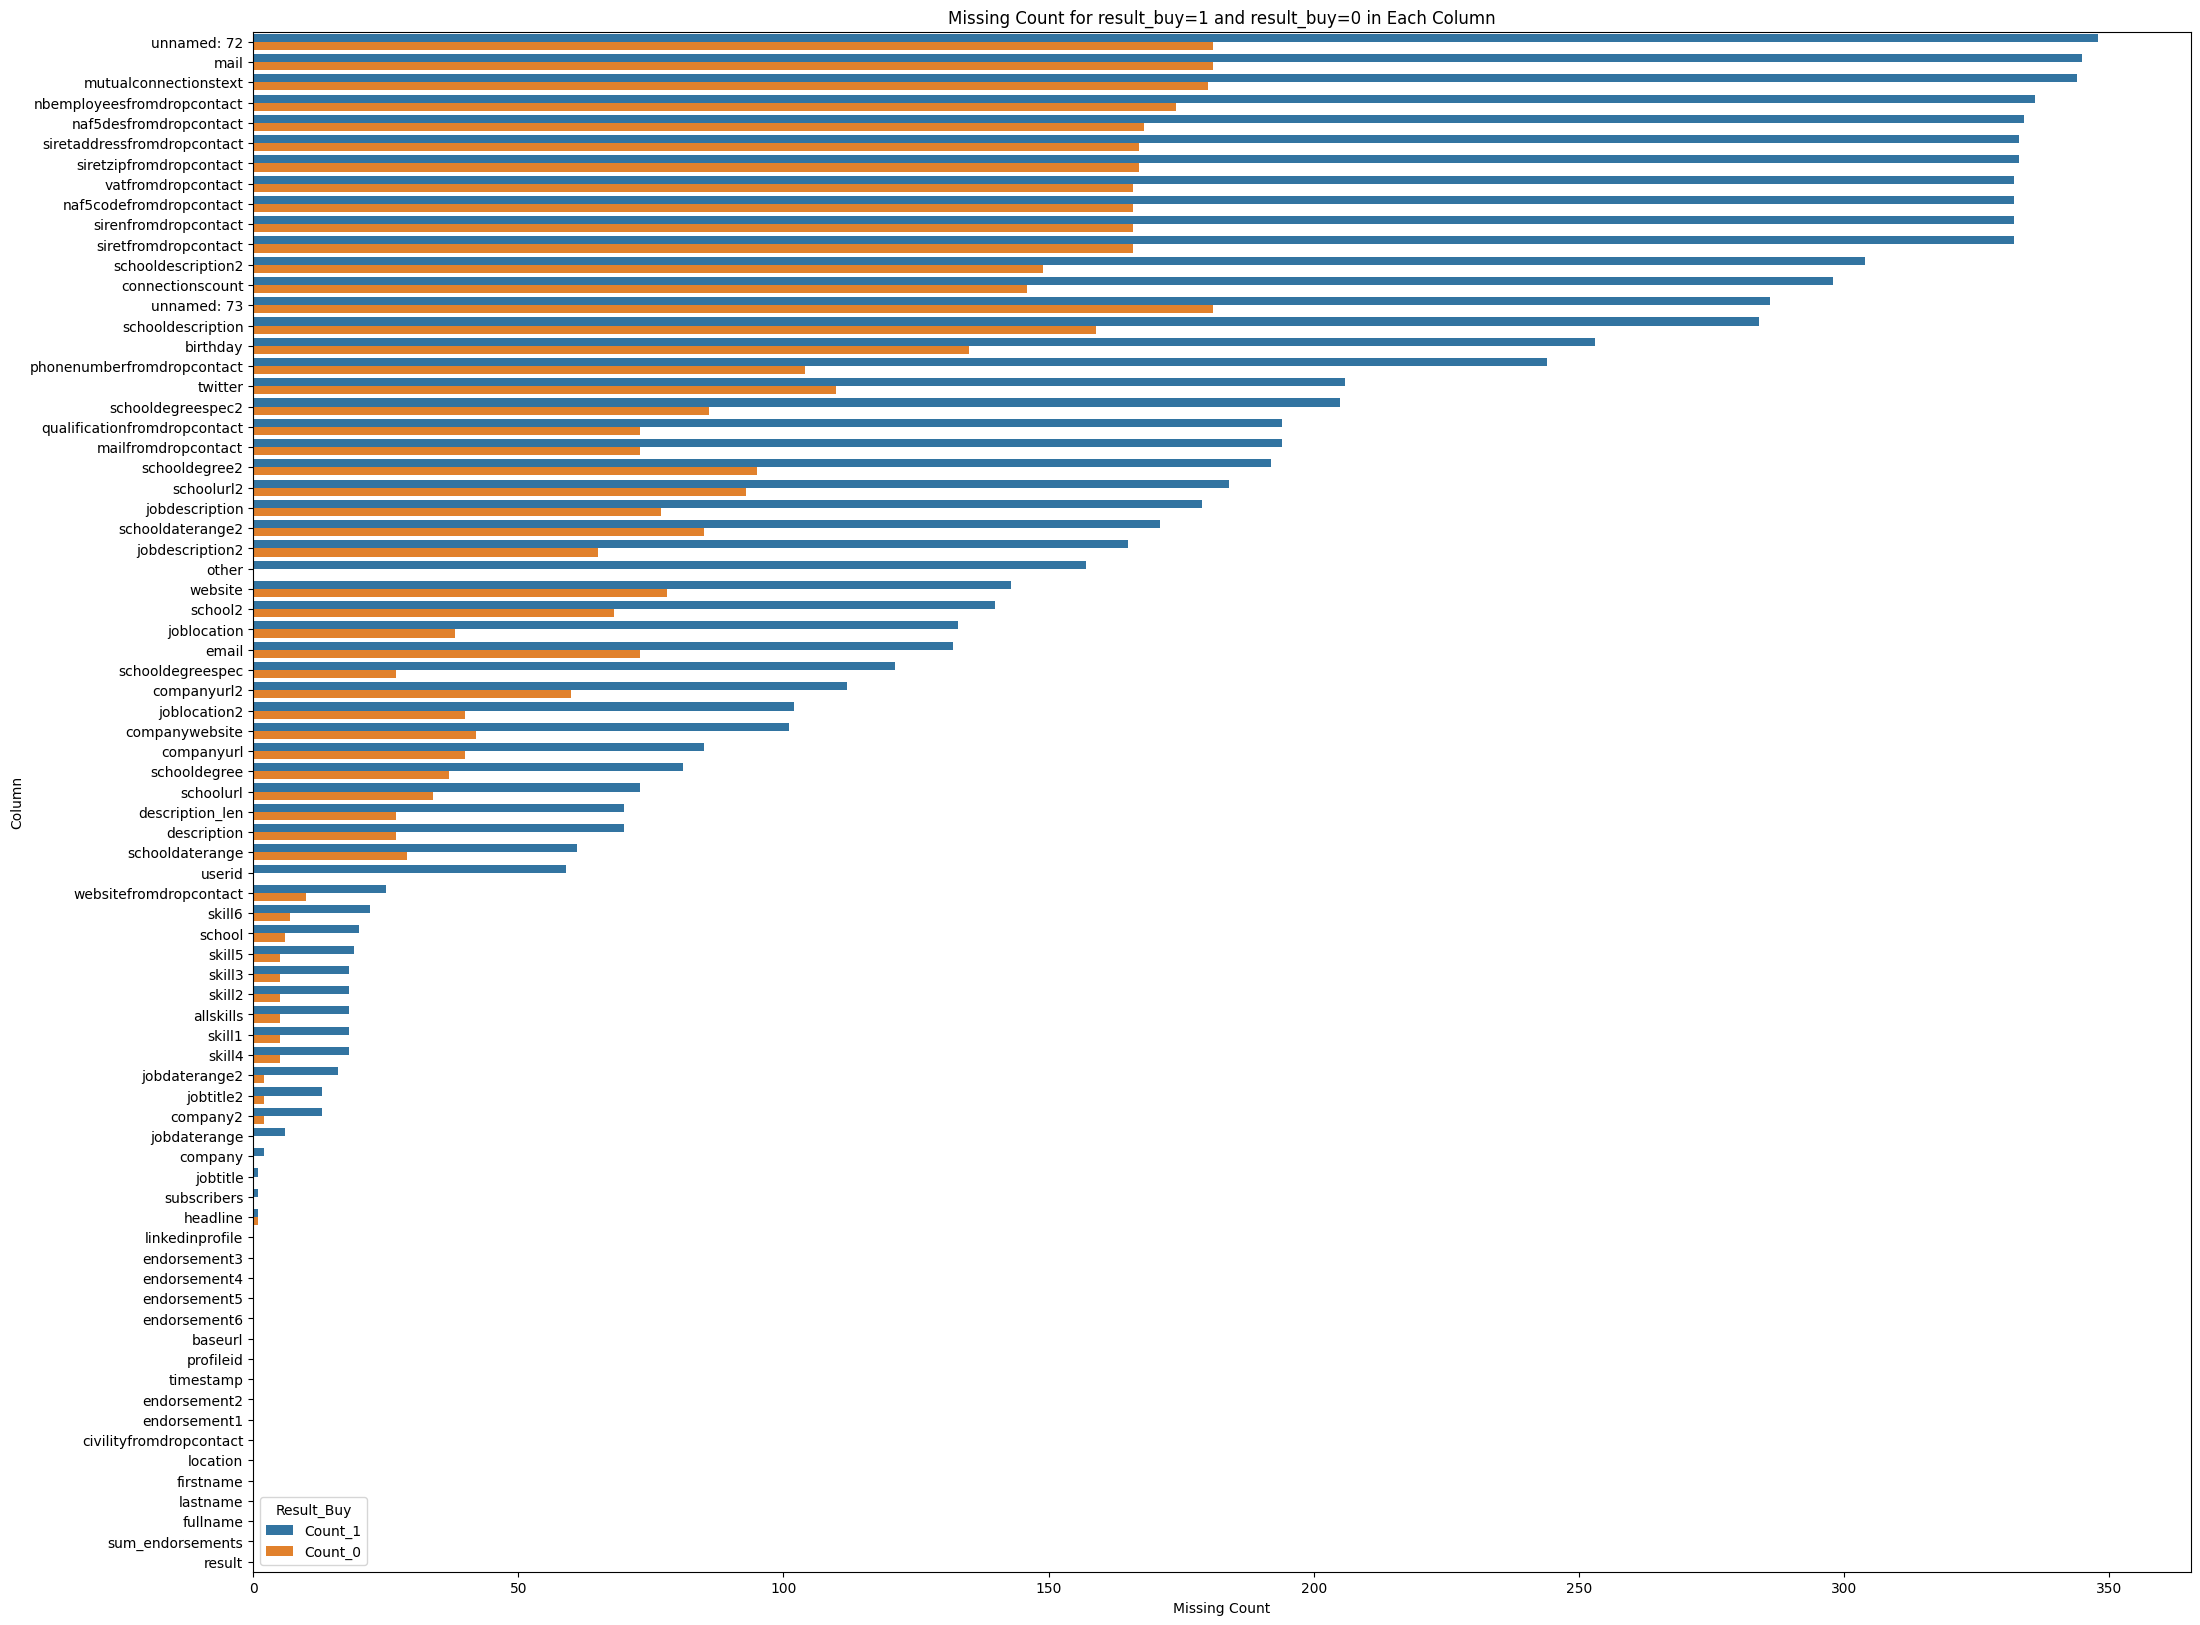

In [31]:
result_df['Count_1'] = result_df['1']
result_df['Count_0'] = result_df['0']
melted_df = pd.melt(result_df, id_vars=['Column'], value_vars=['Count_1', 'Count_0'], var_name='Result_Buy', value_name='Missing_Count')
plt.figure(figsize=(25, 20))
sns.barplot(x='Missing_Count', y='Column', hue='Result_Buy', data=melted_df.sort_values(by='Missing_Count', ascending=False))
plt.title('Missing Count for result_buy=1 and result_buy=0 in Each Column')
plt.xlabel('Missing Count')
plt.ylabel('Column')
plt.show()

***Output:*** The table and the chart clearly show that those who purchase tickets and those who don't fill in different sections. However, those who buy tickets and participated in 2021 do so much more frequently. The most commonly left blank fields are: unnamed:72, mail, mutualconnectionstext...

### Dependency on the field other

It's not very clear what this field is, but there is a clear correlation in it. In half of the records, this field is filled, and most users who fill in this field do not purchase tickets.

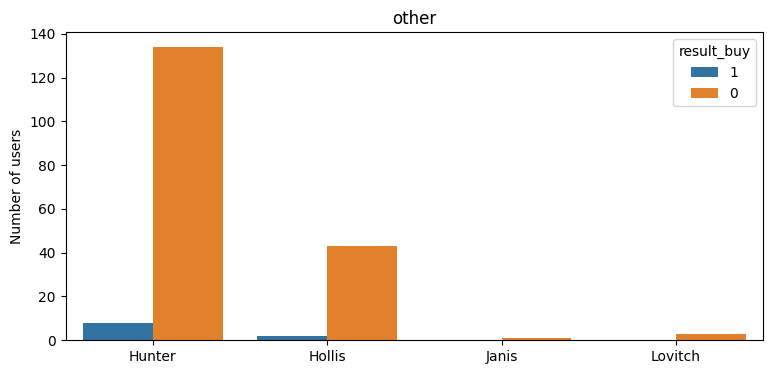

In [32]:
plt.figure(figsize=(9,4))
sns.countplot(x=df["other"], hue=df["result_buy"])
plt.title('other')
plt.xlabel('')
plt.ylabel('Number of users')
plt.show()

In [33]:
df['other'].unique()
df.groupby(['other']) ['result'].value_counts(normalize=True)

other    result                 
Hollis   2. Sent Personal f/u       0.400000
         Out of Sequence            0.333333
         3. Approved                0.222222
         4.Purchased Event          0.044444
Hunter   2. Sent Personal f/u       0.767606
         3. Approved                0.105634
         Out of Sequence            0.070423
         4.Purchased Event          0.028169
         5. Purchased Membership    0.028169
Janis    3. Approved                1.000000
Lovitch  3. Approved                0.666667
         Out of Sequence            0.333333
Name: proportion, dtype: float64

## General Conclusion - Portrait of an Ideal Profile

We had a dataset containing user profiles, successfully read from a file. The table consisted of 74 columns and 348 rows. After analyzing the data, we identified key features of an ideal LinkedIn profile to attract users:

- Users with a large number of followers.
- Gender unspecified.
- More than 500 connections.
- Most popular skills: Marketing, Entrepreneurship, Social Media Marketing, Marketing Strategy, Social Media.
- Users confirming their skills typically have scores ranging from 127 to 175 and higher than 475.
- Frequently encountered are unfilled profile sections, such as unnamed:72, mail, mutualconnectionstext...

In conclusion, for a more detailed analysis, one can consider additional aspects:

Skills: Evaluate the skills listed in the profile, as having certain skills may indicate interest in specific areas.
Recommendations: Check for recommendations from colleagues or partners, which can indicate professionalism and trust.
Activity: Examine the frequency of posts, comments, and participation in groups, as active profiles may be more interested in events and memberships.
Location: Verify if profiles are in the region where events are organized to assess local interest.
However, for a more accurate analysis, the specifics of the job for which we want to attract users should be considered.